In [ ]:
data_url = 'https://raw.githubusercontent.com/deadex-ng/smartAd_ab_testing/main/data/AdSmartABdata.csv'

Experiment Hypothesis

The null hypothesis for this experiment is that there is no difference in brand awereness between the exposed group and control group.

The alternative hypothesis for this experiment is that the exposed are more aware of the brand than the control group.

In [ ]:
import pandas as pd
import seaborn as sns
import math as mt 
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
df = pd.read_csv(data_url)
df.head(2)

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0


In [ ]:
#get number of rows and columns from the data
df.shape

(8077, 9)

In [ ]:
#check data types of the columns 
df.dtypes

auction_id     object
experiment     object
date           object
hour            int64
device_make    object
platform_os     int64
browser        object
yes             int64
no              int64
dtype: object

In [ ]:
#Histogran ploting function 
def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    plt.figure(figsize=(10, 5))
    # fig, ax = plt.subplots(1, figsize=(12, 7))
    sns.displot(data=df, x=column, color=color, height=5, aspect=2)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.show()


<Figure size 720x360 with 0 Axes>

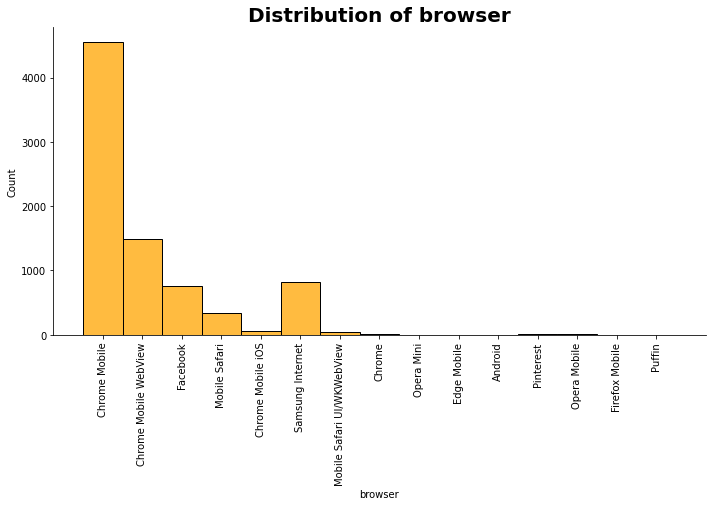

In [ ]:
plot_hist(df,'browser','orange') 

>>> The histogram shows the browsers in corespondence with the number of users who use them. Chrome mobile is the most used browser.

<Figure size 720x360 with 0 Axes>

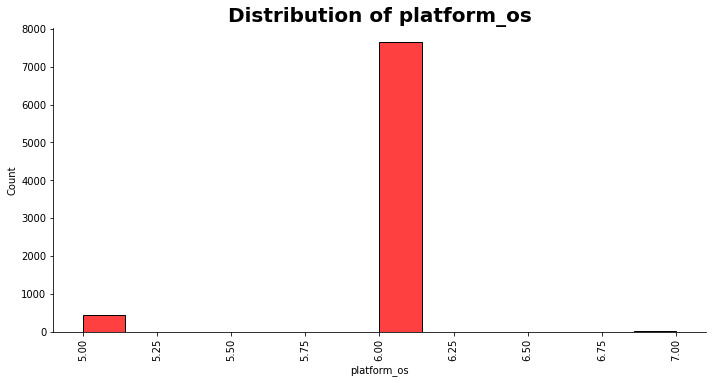

In [ ]:
plot_hist(df,'platform_os','red') 

>>> This graph shows the distribution of platform os used. From the graph,it's clear that users are clearly divided on the platform os that they use.

<Figure size 720x360 with 0 Axes>

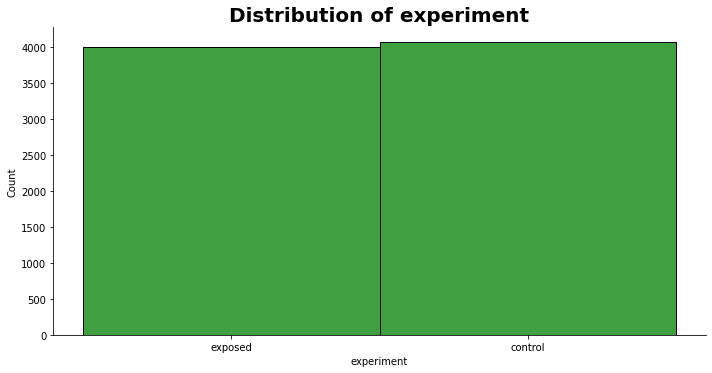

In [ ]:
plot_hist(df,'experiment','green')  

>>> The histogram shows the distribution of users.There are two groups of users and each belong to a certain group,either 'exposed' or 'control'

<Figure size 720x360 with 0 Axes>

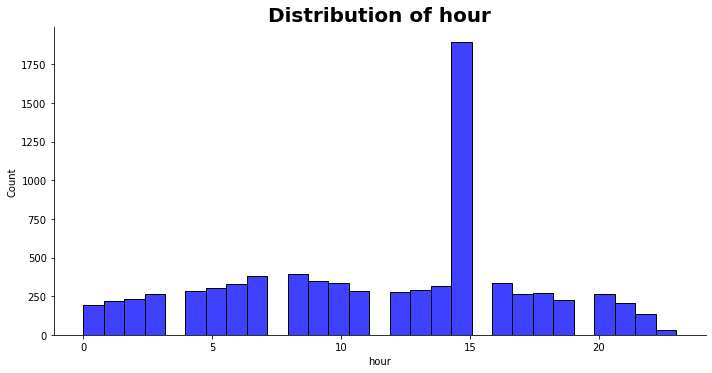

In [ ]:
plot_hist(df,'hour','blue')  

>>>The histogram shows that time has a negative skewness.

Invariate metrics from_ the data


1.   number of users in_ exposed + control 
2.   device make in_ each group
3.   platform os in_ each group
4.   browser in_ each group




In [ ]:
df_exposed = df.loc[df['experiment']=='exposed']
df_control = df.loc[df['experiment']=='control']

In [ ]:
exp_users = df_exposed['auction_id'].nunique()
cont_users = df_control['auction_id'].nunique()
exp_dev = df_exposed['device_make'].nunique()
cont_dev = df_control['device_make'].nunique()
exp_platos = df_exposed['platform_os'].nunique()
cont_platos = df_control['platform_os'].nunique()
exp_browser = df_exposed['browser'].nunique()
cont_browser = df_control['browser'].nunique()

In [ ]:
print('Exposed Users: ',exp_users)
print('Control Users: ',cont_users)
users_total = exp_users + cont_users

Exposed Users:  4006
Control Users:  4071


The number of users in 'exposed' and 'control' is relatively similar. 

In [ ]:
print('Exposed Users Devices: ',exp_dev)
print('Control Users Devices: ',cont_dev)

Exposed Users Devices:  218
Control Users Devices:  169


In [ ]:
print('Exposed Users Platform os: ',exp_platos)
print('Control Users: Platform os: ',cont_platos)

Exposed Users Platform os:  3
Control Users: Platform os:  2


In [ ]:
print('Exposed Users Browser: ',exp_browser)
print('Control Users Browser: ',cont_browser)

Exposed Users Browser:  12
Control Users Browser:  12


Evaluation metrics 

1.   Gross Conversion(people who remember the brand/Total number of users)
2.   Rentention(People who remember the brand/People who are exposed)
3.   Net Conversion( those who remember brand out of all total users)



In [ ]:
baseline = {"Cookies":1000,"Exposed":540,"GConversion":0.20625,
           "Retention":0.53,"NConversion":0.109313}

In [ ]:
#Scale The counts estimates
baseline["Cookies"] = 250
baseline["Exposed"]=baseline["Exposed"]*(5000/1000)
baseline

{'Cookies': 250,
 'Exposed': 2700.0,
 'GConversion': 0.20625,
 'NConversion': 0.109313,
 'Retention': 0.53}

Assumptions 
1. Cookies = Avg number of cookies on our site 
2. Exposed = Avg number of those who are shown a new campagn
3. GConversion = Those exposed out of all total users
4. Rentention = Remember brand given Exposed
5. NetConversion = those who remember brand out of all total users

In [ ]:
# Let's get the p and n we need for Gross Conversion (GC)
# and compute the Stansard Deviation(sd) rounded to 4 decimal digits.
GC={}
GC["d_min"]=0.01
GC["p"]=baseline["GConversion"]
#p is given in this case - or we could calculate it from enrollments/clicks
GC["n"]=baseline["Exposed"]
GC["sd"]=round(mt.sqrt((GC["p"]*(1-GC["p"]))/GC["n"]),4)
GC["sd"]

0.0078

In [ ]:
# Let's get the p and n we need for Retention(R)
# and compute the Stansard Deviation(sd) rounded to 4 decimal digits.
R={}
R["d_min"]=0.01
R["p"]=baseline["Retention"]
R["n"]=baseline["Exposed"]
R["sd"]=round(mt.sqrt((R["p"]*(1-R["p"]))/R["n"]),4)
R["sd"]

0.0096

In [ ]:
# Let's get the p and n we need for Net Conversion (NC)
# and compute the Standard Deviation (sd) rounded to 4 decimal digits.
NC={}
NC["d_min"]=0.0075
NC["p"]=baseline["NConversion"]
NC["n"]=baseline["Cookies"]
NC["sd"]=round(mt.sqrt((NC["p"]*(1-NC["p"]))/NC["n"]),4)
NC["sd"]

0.0197

We now need to calculate the sample size needed for our experiment.The sample size is calculated using the code below.

In [ ]:
def get_z_score(alpha):
  return norm.ppf(alpha)

def get_sds(p,d):
  sd1=mt.sqrt(2*p*(1-p))
  sd2=mt.sqrt(p*(1-p)+(p+d)*(1-(p+d)))
  sds=[sd1,sd2]
  return sds

def get_sampSize(sds,alpha,beta,d):
    n=pow((get_z_score(1-alpha/2)*sds[0]+get_z_score(1-beta)*sds[1]),2)/pow(d,2)
    return n

The hypothesis is tasted using z-score because the sample size is more than 30. Though the data is not normally distributed, the central limit theorem says that as samples get larger,samples are considered to be approximatelly normally distributed.This gives us the confidence to us the z-test. 

The z-test requires that the standard deviation and variance be known in advance. In our case, the standard deviation and variance can be calculated.

Calculate sample size per metric.

In [ ]:
#d is the minimun change
GC["d"]=0.01
R["d"]=0.01
NC["d"]=0.0075

Gross Conversion sample

In [ ]:
# Let's get an integer value for simplicity
GC["SampSize"]=round(get_sampSize(get_sds(GC["p"],GC["d"]),0.05,0.2,GC["d"]))
GC["SampSize"]

25835

In [ ]:
GC["SampSize"]=round(GC["SampSize"]/0.08*2)
GC["SampSize"]

645875

Rentention sample

In [ ]:
# Getting a nice integer value
R["SampSize"]=round(get_sampSize(get_sds(R["p"],R["d"]),0.05,0.2,R["d"]))
R["SampSize"]

39087

In [ ]:
R["SampSize"]=R["SampSize"]/0.08/0.20625*2
R["SampSize"]

4737818.181818182

Net conversion sample

In [ ]:
# Getting a nice integer value
NC["SampSize"]=round(get_sampSize(get_sds(NC["p"],NC["d"]),0.05,0.2,NC["d"]))
NC["SampSize"]

27413

In [ ]:
NC["SampSize"]=NC["SampSize"]/0.08*2
NC["SampSize"]

685325.0

In [ ]:
p=0.5
alpha=0.05
p_hat=round(cont_users/(users_total),4)
sd=mt.sqrt(p*(1-p)/(users_total))
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4891 and 0.5109 ; Is 0.504 inside this range?


Examing effect size

In [ ]:
#Net Conversion - number of 'yes' divided by number of total number of users
yes_exp=df_exposed["yes"].sum()
yes_cont=df_control["yes"].sum()


NC_cont=yes_exp/exp_users
NC_exp=yes_cont/cont_users
NC_pooled=(yes_exp+yes_cont)/(exp_users+cont_users)
NC_sd_pooled=mt.sqrt(NC_pooled*(1-NC_pooled)*(1/cont_users+1/exp_users))
NC_ME=round(get_z_score(1-alpha/2)*NC_sd_pooled,4)
NC_diff=round(NC_exp-NC_cont,4)
print("The change due to the experiment is",NC_diff*100,"%")
print("Confidence Interval: [",NC_diff-NC_ME,",",NC_diff+NC_ME,"]")
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if",NC["d_min"],"is not in the CI as well.")

The change due to the experiment is -1.2 %
Confidence Interval: [ -0.0232 , -0.0008000000000000004 ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if 0.0075 is not in the CI as well.


According to the result there is a change due to the experiment. The change was both statically and significantly significant.We have a negative change of 1.2%,when we were willing to accept any change greater than 1%.This means the Net Conversion(those who remember the brand out of all users) has decreased by 1.2%.